### 1️⃣ Linear Regression

### Explanation of Linear Regression

Linear Regression → Predict Wine Quality (Regression)

Use: Predict a continuous target (wine quality score from 0–10).

Why: Helps understand how features (alcohol, acidity, etc.) influence quality numerically.

Example: Predicts quality = 6.5 for a wine.


model = LinearRegression() → Creates a Linear Regression model

model.fit(X_train, y_train) →
Learns the equation:
Quality= w1 x Feature1 + w2 x Feature2 + .... + b
Finds coefficients wi and intercepts b by minimizing Mean Squared Error

model.predict(X_test) → Uses learned weights to predict quality scores for test data

Metrics:
MSE → Average squared difference between actual and predicted values.
                                                                      
R² Score → How well the model explains variance (1 = perfect fit).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('winequality-red.csv', sep=';')

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.39002514396395416
R² Score: 0.4031803412796231


### 2️⃣ Logistic Regression – Classify Good/Bad Wine

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:

# Create binary target
df['good'] = np.where(df['quality'] >= 7, 1, 0)

X = df.drop(['quality', 'good'], axis=1)
y = df['good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.859375
Confusion Matrix:
 [[264   9]
 [ 36  11]]


# Explanation:
Logistic Regression → Classify Good/Bad Wine

Use: Binary classification (Good wine = 1, Bad wine = 0).

Why: Sometimes we only care if a wine is good or not.

Example: Predicts Good Wine if probability ≥ 0.5.


LogisticRegression() → Uses sigmoid function to classify probabilities.

fit() → Learns weights to separate good vs bad wines.

predict() → Returns 0 (bad) or 1 (good).

Accuracy + confusion matrix show classification results.

## 3️⃣ Decision Tree – Classification

In [9]:
# ---------------->>>>> core portion of code

# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Convert target to binary (Good = 1, Bad = 0)
df['good'] = np.where(df['quality'] >= 7, 1, 0)

# Features and target
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Main Decision Tree Algorithm
# ------------------------------
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------------------
# # Visualization
# # ------------------------------
# plt.figure(figsize=(20, 10))
# plot_tree(
#     dt,
#     feature_names=X_train.columns,
#     class_names=["Bad Wine", "Good Wine"],
#     filled=True,
#     rounded=True,
#     fontsize=10
# )
# plt.title("Decision Tree Visualization for Wine Classification")
# plt.show()


Accuracy: 0.86875
Confusion Matrix:
 [[262  11]
 [ 31  16]]


# Explanation:
Decision Tree → Classification
 
Use: Splits data into tree-like structures based on feature values.

Why: Easy to interpret, shows decision rules for wine quality.

Example: If alcohol > 10.5 and acidity < 0.5 → “Good Wine”.


Builds a tree structure:
Splits data using conditions (e.g., alcohol > 10 → good).

max_depth prevents overfitting.

Each leaf represents a class (good/bad).

## 4️⃣ Random Forest – Classification

In [11]:

# ---------------->>>>> core portion of code

# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))


Random Forest → Accuracy: 0.9
Confusion Matrix:
 [[264   9]
 [ 23  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



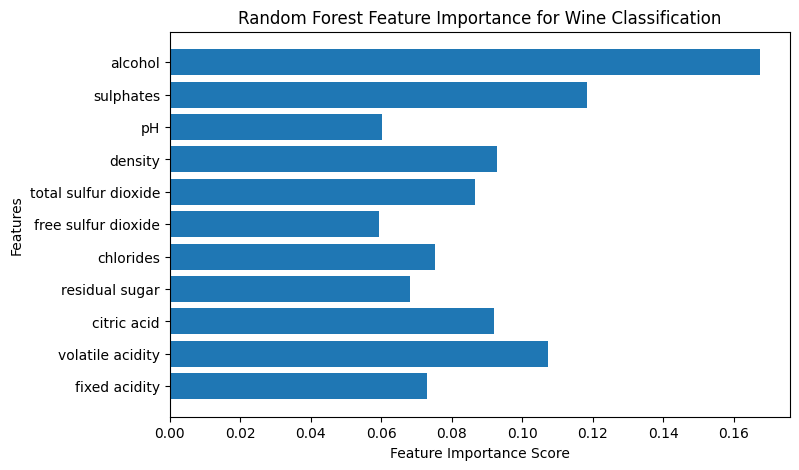

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Convert target to binary (Good = 1, Bad = 0)
df['good'] = np.where(df['quality'] >= 7, 1, 0)

# Features and target
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Random Forest Algorithm
# ------------------------------
rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Trees expand until all leaves are pure
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
print("Random Forest → Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Feature Importance Visualization
# ------------------------------
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Wine Classification")
plt.show()


## Explanation
Random Forest → Classification

Use: Ensemble of multiple decision trees to improve accuracy.

Why: Reduces overfitting, handles feature interactions well.

Example: Votes from 100 trees → final decision = “Bad Wine”.

Creates multiple decision trees.

Each tree votes → majority decision = final classification.

Reduces overfitting compared to single decision tree.

## 5️⃣ k-NN – Classification

In [13]:

# ---------------->>>>> core portion of code

# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))


k-NN → Accuracy: 0.85625
Confusion Matrix:
 [[264   9]
 [ 37  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.53      0.21      0.30        47

    accuracy                           0.86       320
   macro avg       0.70      0.59      0.61       320
weighted avg       0.83      0.86      0.83       320



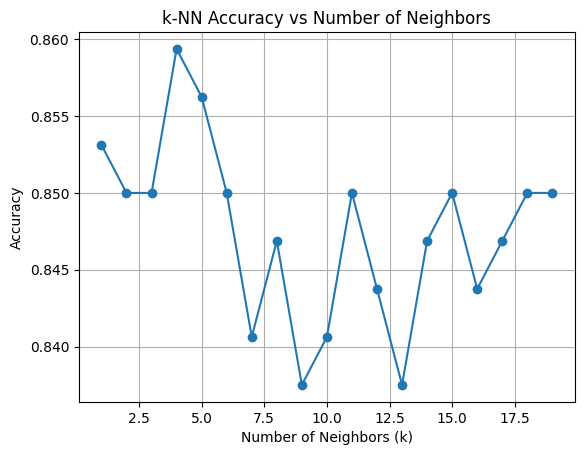

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Convert target to binary (Good = 1, Bad = 0)
df['good'] = np.where(df['quality'] >= 7, 1, 0)

# Features and target
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# k-NN Algorithm
# ------------------------------
knn = KNeighborsClassifier(n_neighbors=5)  # Uses 5 nearest neighbors
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
print("k-NN → Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Accuracy for different k values
# ------------------------------
accuracies = []
neighbors = range(1, 20)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(neighbors, accuracies, marker='o')
plt.title('k-NN Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## Explanation
k-Nearest Neighbors (k-NN) → Classification

Use: Classifies a wine based on the majority class of its nearest neighbors.

Why: Simple, non-parametric method to detect similar wines.

Example: If 4 out of 5 nearest wines are good → classify as “Good”.

Finds the 5 nearest wines in feature space.

Classifies based on majority of neighbors.

Works well when data is well-clustered.

k-NN is a non-parametric method:

It doesn’t learn weights or build a tree.

Simply stores all training data.

When predicting:

Finds the k closest data points (neighbors) in feature space.

Uses majority vote to classify.

## 6️⃣ SVM – Classification

In [15]:
# ---------------->>>>> core portion of code

# from sklearn.svm import SVC

# svm = SVC(kernel='rbf')
# svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Convert target to binary (Good = 1, Bad = 0)
df['good'] = np.where(df['quality'] >= 7, 1, 0)

# Features and target
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# SVM Algorithm
# ------------------------------
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
print("SVM → Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# # Visualization with PCA (2D plot)
# # ------------------------------
# pca = PCA(n_components=2)
# X_train_2D = pca.fit_transform(X_train)
# X_test_2D = pca.transform(X_test)

# svm_model_2D = SVC(kernel='rbf', C=1.0, gamma='scale')
# svm_model_2D.fit(X_train_2D, y_train)

# # Create grid to visualize decision boundary
# x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
# y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                      np.arange(y_min, y_max, 0.1))
# Z = svm_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("SVM Decision Boundary (2D PCA projection)")
# plt.show()


SVM → Accuracy: 0.85625
Confusion Matrix:
 [[273   0]
 [ 46   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



## Explanation
Support Vector Machine (SVM) → Classification

Use: Finds a decision boundary (hyperplane) that separates good and bad wines.

Why: Handles complex boundaries and works well with high-dimensional data.

Example: Draws a line that maximizes margin between good and bad samples

Finds a decision boundary (hyperplane) that maximizes margin between good and bad wines.

kernel='rbf' → Handles non-linear boundaries.

## Code Breakdown:

SVC(kernel='rbf') → Uses Radial Basis Function to handle non-linear boundaries.

C=1.0 → Regularization parameter (higher C = less margin, more focus on classification).

gamma='scale' → Controls influence of individual samples.

fit(X_train, y_train) → Finds the optimal hyperplane.

predict(X_test) → Classifies test wines.

### Can handle:

Linear separation → kernel='linear'

Non-linear separation → kernel='rbf' or poly.

## 7️⃣ Naïve Bayes – Classification

In [22]:
# ---------------->>>>> core portion of code

# from sklearn.naive_bayes import GaussianNB

# nb = GaussianNB()
# nb.fit(X_train, y_train)
# y_pred = nb.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Convert target to binary (Good = 1, Bad = 0)
df['good'] = np.where(df['quality'] >= 7, 1, 0)

# Features and target
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Naïve Bayes Algorithm
# ------------------------------
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
print("Naïve Bayes → Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# # Visualization with PCA (2D)
# # ------------------------------
# pca = PCA(n_components=2)
# X_train_2D = pca.fit_transform(X_train)
# X_test_2D = pca.transform(X_test)

# nb_2D = GaussianNB()
# nb_2D.fit(X_train_2D, y_train)

# # Create grid for decision boundary
# x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
# y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                      np.arange(y_min, y_max, 0.1))
# Z = nb_2D.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("Naïve Bayes Decision Boundary (2D PCA projection)")
# plt.show()


Naïve Bayes → Accuracy: 0.853125
Confusion Matrix:
 [[236  37]
 [ 10  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.50      0.79      0.61        47

    accuracy                           0.85       320
   macro avg       0.73      0.83      0.76       320
weighted avg       0.89      0.85      0.87       320



## Explanation 
Naïve Bayes → Classification

Use: Probabilistic classifier based on Bayes’ theorem with feature independence assumption.

Why: Very fast and works well with categorical or text features.

Example: Calculates 
P(Good∣Features) and classifies accordingly.

Uses Bayes’ theorem assuming features are independent.

Calculates probabilities of good/bad → predicts the higher one.

Very fast, works well with small datasets.

## Code Breakdown
GaussianNB() → Creates a Naïve Bayes classifier for continuous data.

fit(X_train, y_train) → Calculates:

Mean and variance of each feature for both classes.

Prior probabilities of each class.

predict(X_test) → Uses Bayes’ theorem to classify test wines.

## Often used for:

Text classification (spam detection).

Medical diagnosis.

## 8️⃣ k-Means – Clustering

In [29]:
# ---------------->>>>> core portion of code

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(X)
# print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster counts:
 Cluster
1    1009
0     590
Name: count, dtype: int64

Cluster vs Good Wine:
 good       0    1
Cluster          
0        449  141
1        933   76


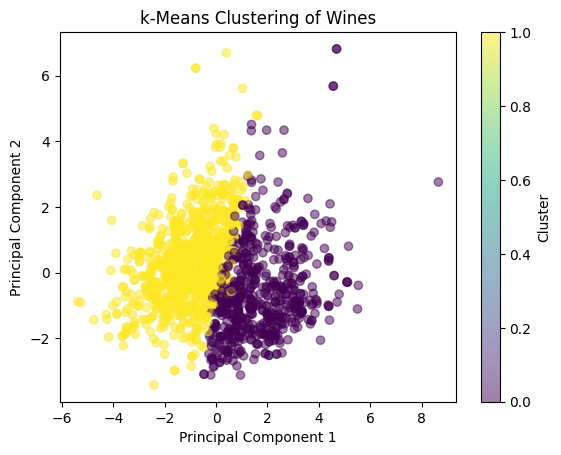

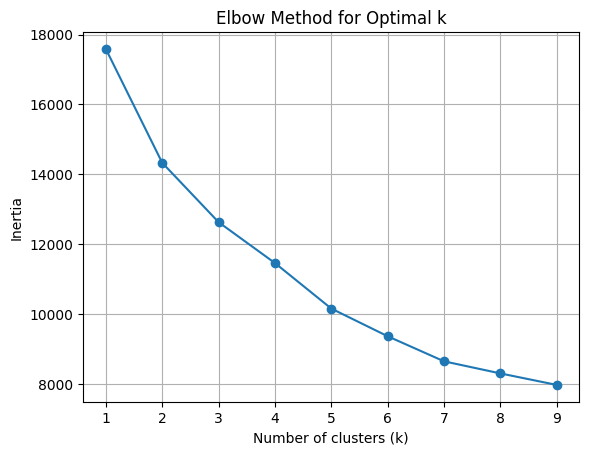

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Features only (no labels because it's unsupervised)
X = df.drop('quality', axis=1)

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# k-Means Algorithm
# ------------------------------
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters
print("Cluster counts:\n", df['Cluster'].value_counts())

# ------------------------------
# Evaluation: Compare clusters with actual wine quality (optional)
# ------------------------------
df['good'] = np.where(df['quality'] >= 7, 1, 0)
print("\nCluster vs Good Wine:\n", pd.crosstab(df['Cluster'], df['good']))

# ------------------------------
# Visualization using PCA
# ------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("k-Means Clustering of Wines")
plt.colorbar(label='Cluster')
plt.show()

# ------------------------------
# Elbow method to choose optimal k
# ------------------------------
inertia = []
k_values = range(1, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## Explanation
k-Means → Clustering

Use: Groups wines into clusters (unsupervised).

Why: Helps discover natural wine types without labels.

Example: Clusters wines into 2 types → "Cluster A" (sweet), "Cluster B" (dry).

Unsupervised algorithm → groups wines into 2 clusters.

Finds cluster centers (like average feature values for each group).

Can help discover wine types (sweet vs dry) without labels.

 ## Algorithm Concept
k-Means groups data into k clusters by:

Choosing k centroids.

Assigning each wine to the nearest centroid.

Updating centroids based on assigned wines.

Repeating until convergence.

We chose k=2 (possibly good vs bad clusters).

## Code Breakdown
StandardScaler() → Normalizes features (important for distance-based algorithms).

KMeans(n_clusters=2) → Creates 2 clusters.

.fit_predict(X_scaled) → Runs clustering and returns cluster labels.

Added labels to df['Cluster'] for inspection.

## 9️⃣ PCA – Dimensionality Reduction

In [30]:
# ---------------->>>>> core portion of code

# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.28173931 0.1750827 ]
Total variance retained: 0.45682201184294047


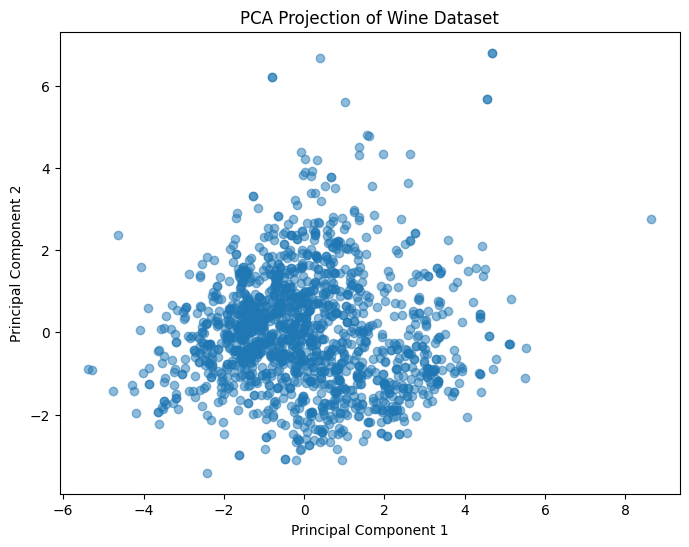

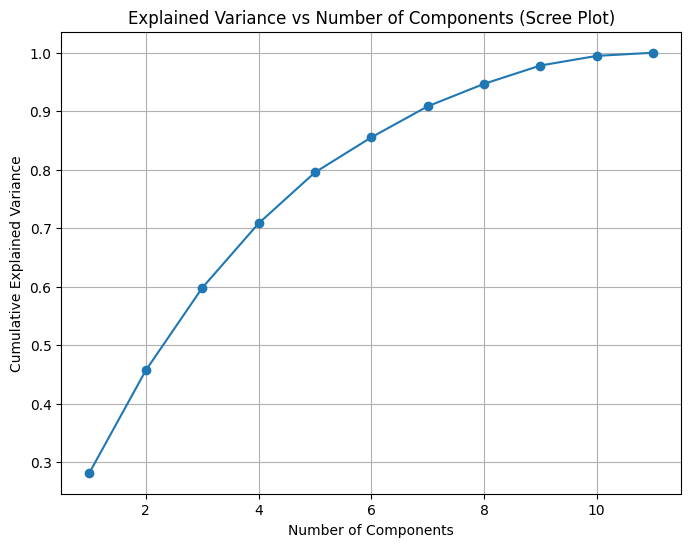

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Features only (no target)
X = df.drop('quality', axis=1)

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# Apply PCA
# ------------------------------
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

# ------------------------------
# Visualization
# ------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Wine Dataset")
plt.show()

# ------------------------------
# Scree plot for all components
# ------------------------------
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components (Scree Plot)')
plt.grid(True)
plt.show()


## Explanation
PCA → Dimensionality Reduction

Use: Reduces feature count while keeping most variance.

Why: Speeds up training, removes noise, helpful for visualization.

Example: 11 features → 2 principal components for plotting wine distribution.

Reduces 11 wine features → 2 components while keeping most variance.

Useful for visualizing wines in 2D.

Helps speed up other algorithms.

## Algorithm Concept
PCA transforms features into new orthogonal components (PC1, PC2, …).

These components capture:

PC1: Maximum variance in the data.

PC2: Second-most variance, orthogonal to PC1.

This reduces dimensionality while keeping important information.

## Code Breakdown
StandardScaler() → Scales data to mean=0, variance=1 (important for PCA).

PCA(n_components=2) → Reduces features to 2 components.

fit_transform() → Performs PCA transformation.

explained_variance_ratio_ → Shows how much variance each component explains.

## 🔟 Gradient Boosting (XGBoost) – Classification

In [31]:
# ---------------->>>>> core portion of code

# from xgboost import XGBClassifier

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))


XGBoost → Accuracy: 0.878125
Confusion Matrix:
 [[262  11]
 [ 28  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320



C:\Users\Tayyab\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:11:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x600 with 0 Axes>

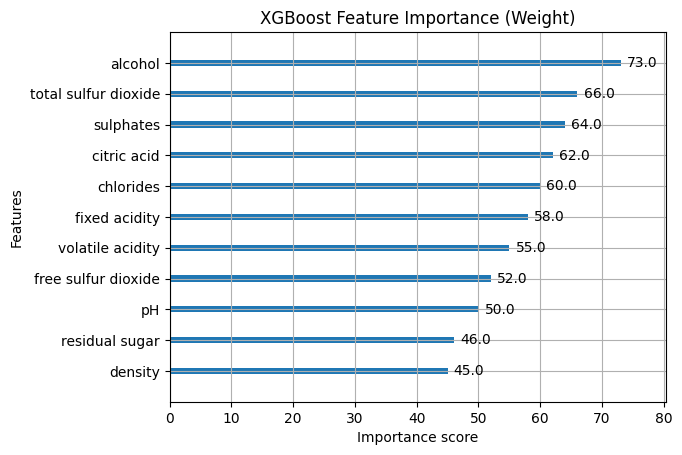

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('winequality-red.csv', sep=';')

# Convert target to binary (Good = 1, Bad = 0)
df['good'] = np.where(df['quality'] >= 7, 1, 0)

# Features and target
X = df.drop(['quality', 'good'], axis=1)
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# XGBoost Algorithm
# ------------------------------
xgb_model = XGBClassifier(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size shrinkage
    max_depth=3,            # Tree depth
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# ------------------------------
# Evaluation
# ------------------------------
print("XGBoost → Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# Feature Importance
# ------------------------------
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("XGBoost Feature Importance (Weight)")
plt.show()


## Explanation
Gradient Boosting (XGBoost) → Classification

Use: Boosting algorithm that builds strong learners from weak learners (trees).

Why: Often gives state-of-the-art accuracy on classification tasks.

Example: Iteratively improves wine classification by correcting previous mistakes.

Builds trees sequentially, each correcting previous errors.

Often achieves highest accuracy.

Used in many Kaggle competition-winning solutions.

## Algorithm Concept
Gradient Boosting is an ensemble method:

Builds multiple trees sequentially.

Each tree learns from the errors of the previous one.

XGBoost is an optimized version:

Faster, handles missing values, regularization to prevent overfitting.

Unlike Random Forest:

RF builds trees independently (parallel).

XGBoost builds trees sequentially (boosting).

## Code Breakdown
XGBClassifier() → Creates a boosting model with decision trees as base learners.

learning_rate=0.1 → Each tree contributes partially to the final prediction.

n_estimators=100 → Number of boosting rounds (trees).

fit() → Sequentially builds trees, minimizing classification error.

plot_importance() → Visualizes which features have the highest contribution.

## Use Case
Works well for:

Complex, non-linear relationships.

Imbalanced datasets.

When you need high accuracy with good generalization.